#                 My First Blog Post on Data Science And Machine Learning
       
       I have recently developed interest in Machine Learning and Data Science. In this post , I will cover a few basic machine learning terminologies and basic regression techniques.
       


#                              What is Machine Learning??
    Machine Learning is basically making a computer learn on it's own from the data by recognising patterns in the data . Ever encountered to prove that you are not a robot while doing a google search and given a task let's say to find out all the images which contains a car. It's easy to visualise for us that the given image contains a car or not but how does a machine recognise whether the image that we choose is correct or not. Surely they won't have hardcoded the stuff as there can be thousands of images found on the net which contains a car in it. Here is where Machine Learning becomes useful. Machine Learning Algorithms try to identify the common patterns in all the images that contain a car and this is fed to the system and the system now is able to correctly recognise that whether an image contains a car in it if it follows a definite pattern.
    Machine Learning is almost used everywhere ranging from finance,stock markets to high end applications like robotics,self driving vehicles and a lot more.
    How does the Machine Learning algorithm predicts a certain event? Naturally we must train the Model and for training we require some data of past events. Let's suppose we wish to predict the housing prices in Mumbai. The first step would be to identify all the parameters on which the price of a house would depend upon like the house area, Location, No of Bedrooms,No of Bathrooms, Whether the Building is newly constructed and so on.
    Next step would be to collect data of all these parameters along with the housing prices for this data.This step is called as Data Minning. The parameters are called as features and the final housing price is called as Target Value.The role of the Machine Learning Algorithm here would be to predict accurately the housing prices for new parameters. 
    Based on the Data that we have, we can classify ML as
    1) Supervised Learning:- If the data that we have contains a target value for all the input features i.e all the entries are provided with a label.  Based on the nature of target value i.e. output , it can be further classified as
        * Classification:- If the output is discrete like yes/no , car/bike/bus , 0-9 
        * Regression:- If the output is continuous like housing price prediction.
    2) Unsupervised Learning:- If the data that we contain doesn't have a target value.Here the job of ML algorithm will be to cluster the data together and predict the output for unknown parameters based on this clusters.


#                         Let's dive into Supervised Learning Example
                
##                                   Housing Price Prediction:-
        Any Data Science project contains the following parts:-
        1)Data Collection
        2)Data Cleaning
        3)Data Visualisation
        4)Choosing appropriate features 
        5)Dividing test set into training set and test set
        6)Converting alphanumeric features to numeric by encoding it
        7)Applying the appropriate Machine Learning Model
        8)Finding the test set accuracy

#                          Data Collection and Cleaning

A lots off datasets are available for housing price prediction online. The problem with them is that they have a lots of missing values so we need to appropriately treat the missing values.
Pandas library in Python is used for this purpose.


First we need to import pandas library and store the data from a csv file to a pandas data frame. Displaying the first few entries of the data we can see that there are a lots of missing values which must be handled

In [1]:
import pandas as pd
data=pd.read_csv(r'''G:\kaggle\abc\train.csv''')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
colsToDrop=[['SalePrice']]
y=data['SalePrice']                            # seperates features and target value from the data
X=data.drop(['SalePrice'],axis=1)
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In this step we split the data into train set and test set in order to evaluate the effectiveness of the model

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

Before we feed data to the Sklearn , we must convert all the alphanumeric data to numeric using Label Encoder Function

In [6]:
from sklearn.preprocessing import LabelEncoder
MSZoningEncoder = LabelEncoder()

StreetEncoder = LabelEncoder()
LotShapeEncoder=LabelEncoder()
SaleTypeEncoder=LabelEncoder()
SaleConditionEncoder=LabelEncoder()
X_train["MSZoning"] = MSZoningEncoder.fit_transform(X_train["MSZoning"].fillna("Nan"))

X_train["Street"] = StreetEncoder.fit_transform(X_train["Street"].fillna("Nan"))
X_train["LotShape"] =LotShapeEncoder.fit_transform(X_train["LotShape"].fillna("Nan"))
X_train["SaleType"] = SaleTypeEncoder.fit_transform(X_train["SaleType"].fillna("Nan"))
X_train["SaleCondition"] =SaleConditionEncoder.fit_transform(X_train["SaleCondition"].fillna("Nan"))
X_test["MSZoning"] = MSZoningEncoder.fit_transform(X_test["MSZoning"].fillna("Nan"))

X_test["Street"] = StreetEncoder.fit_transform(X_test["Street"].fillna("Nan"))
X_test["LotShape"] =LotShapeEncoder.fit_transform(X_test["LotShape"].fillna("Nan"))
X_test["SaleType"] = SaleTypeEncoder.fit_transform(X_test["SaleType"].fillna("Nan"))
X_test["SaleCondition"] =SaleConditionEncoder.fit_transform(X_test["SaleCondition"].fillna("Nan"))

C:\Users\NISARG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NISARG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\NISARG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In this step , we finalise the features that we are going to use

In [7]:
X_train_final=X_train[['LotFrontage','LotArea','OverallQual','OverallCond','YrSold','MSZoning','Street','LotShape','SaleType','SaleCondition']]
X_test_final=X_test[['LotFrontage','LotArea','OverallQual','OverallCond','YrSold','MSZoning','Street','LotShape','SaleType','SaleCondition']]


In [8]:
X_train_final.isnull().any()

LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YrSold           False
MSZoning         False
Street           False
LotShape         False
SaleType         False
SaleCondition    False
dtype: bool

In [9]:
#Handling missing data- fill it with the mean of all the entries
X_train_final["LotFrontage"].fillna(X_train_final.LotFrontage.mean(), inplace=True)  

C:\Users\NISARG\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
X_test_final.isnull().any()

LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YrSold           False
MSZoning         False
Street           False
LotShape         False
SaleType         False
SaleCondition    False
dtype: bool

In [11]:
X_test_final["LotFrontage"].fillna(X_test_final.LotFrontage.mean(), inplace=True)

C:\Users\NISARG\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
X_train_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YrSold,MSZoning,Street,LotShape,SaleType,SaleCondition
1292,60.000000,6600,5,4,2009,4,1,3,8,4
1018,69.764509,10784,7,5,2007,3,1,0,8,4
1213,69.764509,10246,4,9,2006,3,1,0,8,4
1430,60.000000,21930,5,5,2006,3,1,2,8,4
810,78.000000,10140,6,6,2006,3,1,3,8,4


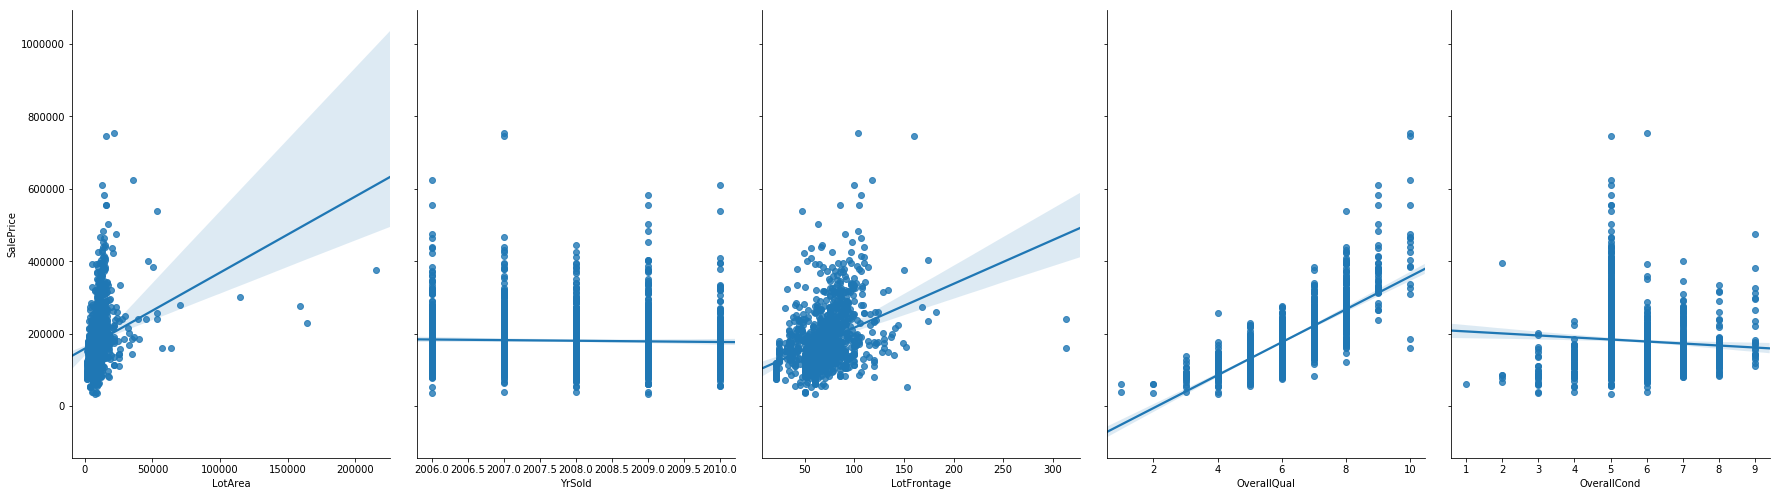

In [21]:

import seaborn as sns
sns.pairplot(data,x_vars=['LotArea','YrSold','LotFrontage','OverallQual','OverallCond'],y_vars='SalePrice',size=7,aspect=0.7,kind='reg')

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_final, y_train)
print("training set score: %f" % ridge.score(X_train_final, y_train))
print("test set score: %f" % ridge.score(X_test_final, y_test))

training set score: 0.690406
test set score: 0.644477


In [23]:
ridge10 = Ridge(alpha=10).fit(X_train_final, y_train)
print("training set score: %f" % ridge10.score(X_train_final, y_train))
print("test set score: %f" % ridge10.score(X_test_final, y_test))

training set score: 0.689856
test set score: 0.644181


In [24]:
ridge01 = Ridge(alpha=0.1).fit(X_train_final, y_train)
print("training set score: %f" % ridge01.score(X_train_final, y_train))
print("test set score: %f" % ridge01.score(X_test_final, y_test))

training set score: 0.690446
test set score: 0.644489
